# Google Colab (Skip locally)

In [ ]:
#@title Mount your Google Drive
# If you run this notebook locally or on a cluster (i.e. not on Google Colab)
# you can delete this cell which is specific to Google Colab. You may also
# change the paths for data/logs in Arguments below.
%matplotlib inline
%load_ext autoreload
%autoreload 2

from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
#@title Link your assignment folder & install requirements
#@markdown Enter the path to the assignment folder in your Google Drive
# If you run this notebook locally or on a cluster (i.e. not on Google Colab)
# you can delete this cell which is specific to Google Colab. You may also
# change the paths for data/logs in Arguments below.
import sys
import os
import shutil
import warnings

folder = "/content/gdrive/MyDrive/IFT6135/HW3_2025/src" #@param {type:"string"}
!ln -Ts "$folder" /content/src 2> /dev/null

# Add the assignment folder to Python path
if '/content/src' not in sys.path:
  sys.path.insert(0, '/content/src')

# Check if CUDA is available
import torch
if not torch.cuda.is_available():
  warnings.warn('CUDA is not available.')

# Imports & Setup

In [1]:
%matplotlib inline
import warnings
from shutil import make_archive
import matplotlib.pyplot as plt
import torchvision
import torch
from torchvision import datasets, transforms
import random

from q1_train_vae import experiment1
from q1_plots_vae import generate_images, plot_loss, plot_traversals, generate_latent_traversals
from q2_trainer_ddpm import experiment2
from q3_trainer_cfg import experiment3

models = ['VAE', 'DDPM', 'CFG']

# Experiments

## Experiment 1 (VAE)

In [2]:
vae_model, vae_optimizer = experiment1(False)

Loaded checkpoint from epoch 20


Saved loss plot to results/experiment1/loss_curve.png


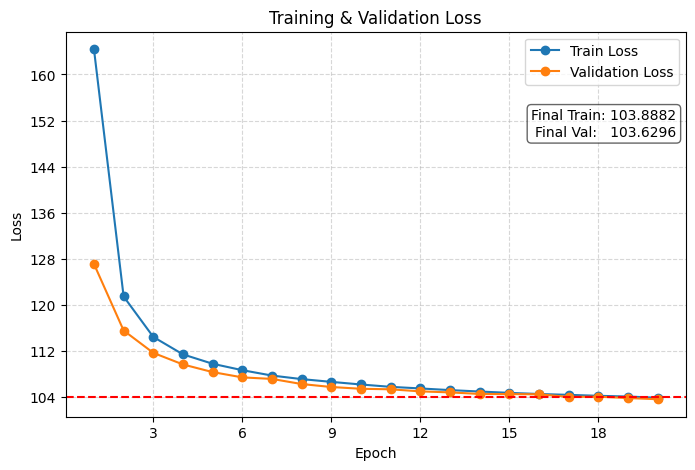

In [3]:
plot_loss('results/experiment1/history.json', save_path='results/experiment1/loss_curve.png', show=True)

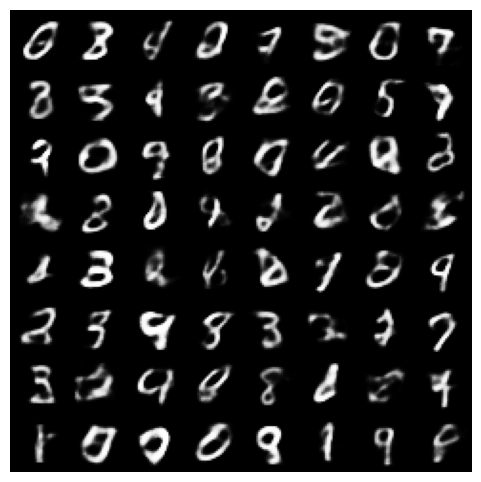

In [4]:
vae_samples = generate_images(vae_model, num_images=64, show=True, file_path='results/experiment1/vae_samples.png')

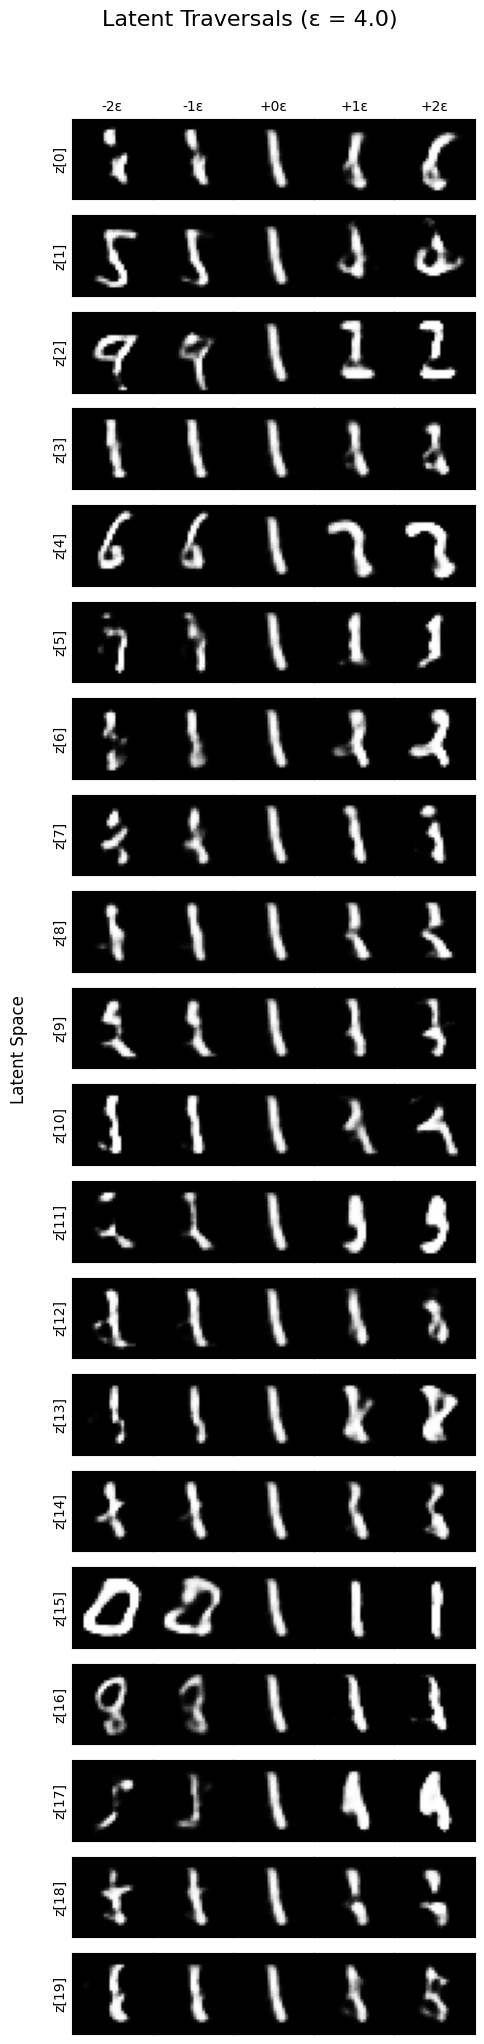

In [5]:
# create the dataset instance
dataset = datasets.MNIST('../data', train=True, download=True, transform=transforms.ToTensor())
rand_idx = random.randint(0, len(dataset) - 1)
datapoint, _ = dataset[rand_idx]

eps = 4.0
tr_dp = generate_latent_traversals(vae_model, n_factors=20, n_steps=5, eps=eps, data_sample=datapoint)
plot_traversals(tr_dp, eps=eps, save_path='results/experiment1/traversals_dp.png', show=True)

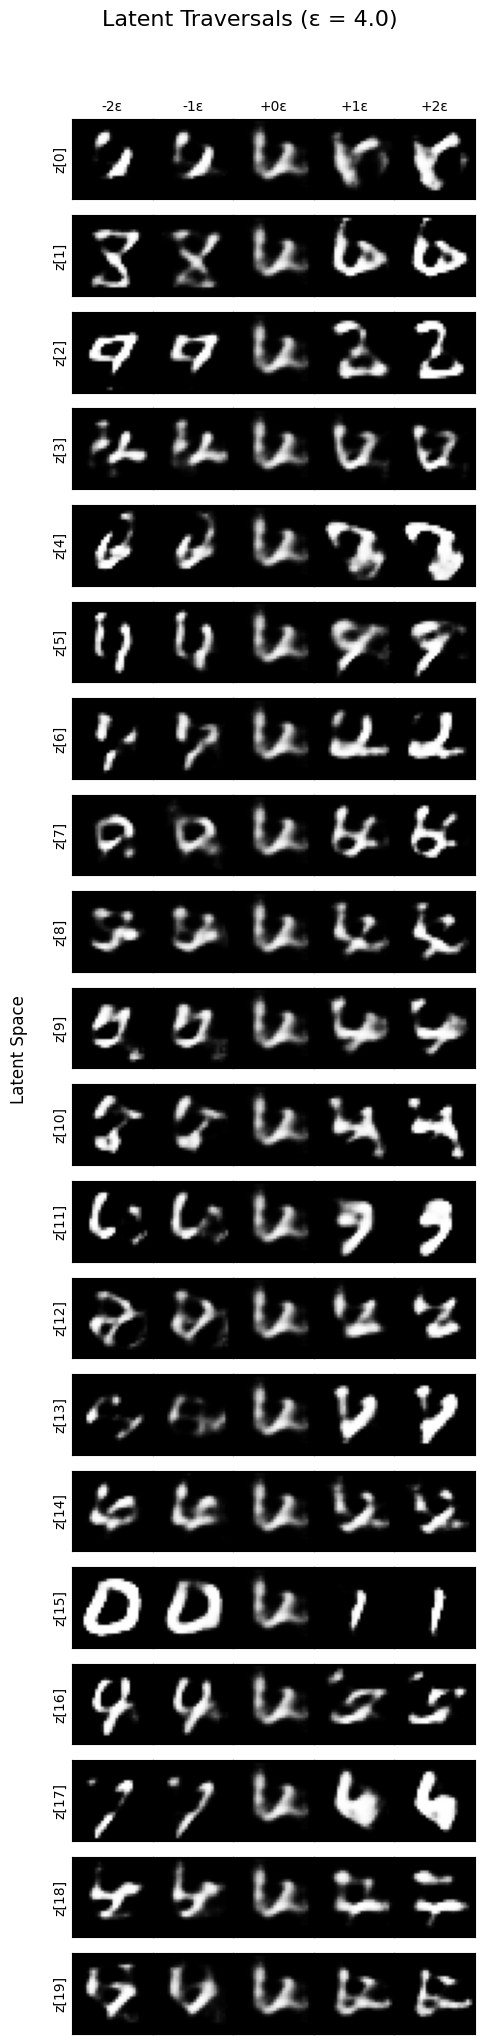

In [6]:
tr_gs = generate_latent_traversals(vae_model, n_factors=20, n_steps=5, eps=eps)
plot_traversals(tr_gs, eps=eps, save_path='results/experiment1/traversals_gs.png', show=True)

In [ ]:
# TODO make_archive('experiment1', 'zip', 'results/experiment1')

## Experiment 2 (DDPM)

In [ ]:
ddpm_trainer = experiment2(False)

In [ ]:
n_samples = 9
n_steps = 1000
ddpm_samples = ddpm_trainer.sample(n_steps=n_steps, n_samples=n_samples, show=True, save=False)

In [ ]:
grid = torchvision.utils.make_grid(ddpm_samples, nrow=8, padding=2)
plt.figure(figsize=(6,6))
plt.imshow(grid.permute(1, 2, 0).cpu(), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# TODO make_archive('experiment2', 'zip', 'results/experiment2')

## Experiment 3 (CFG)

In [ ]:
cfg_trainer = experiment3(False)

In [ ]:
n_samples = 3
labels = torch.randint(0, 9, (n_samples), device=cfg_trainer.args.device)
n_steps = 1000
cfg_samples = cfg_trainer.sample(n_steps=n_steps, show=True, save=False)

In [ ]:
grid = torchvision.utils.make_grid(cfg_samples, nrow=8, padding=2)
plt.figure(figsize=(6,6))
plt.imshow(grid.permute(1, 2, 0).cpu(), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# TODO make_archive('experiment3', 'zip', 'results/experiment3')